In [1]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':[8,8]},font_scale=1.1)

In [2]:
#Importing data
df=pd.read_csv('911.csv')
#Showing a part of the data
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015


In [3]:
#Dataset shape
df.shape

(115211, 14)

In [4]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115211 entries, 0 to 115210
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   lat          115211 non-null  float64
 1   lng          115211 non-null  float64
 2   desc         115211 non-null  object 
 3   zip          100789 non-null  float64
 4   title        115211 non-null  object 
 5   timeStamp    115211 non-null  object 
 6   twp          115177 non-null  object 
 7   addr         115211 non-null  object 
 8   e            115211 non-null  int64  
 9   Reason       115211 non-null  object 
 10  hour         115211 non-null  int64  
 11  month        115211 non-null  int64  
 12  day of week  115211 non-null  object 
 13  Year         115211 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 12.3+ MB


In [5]:
#Rename data columns to lower case
df=df.rename(columns=str.lower)

In [6]:
#Dataset nans
df.isna().sum()

lat                0
lng                0
desc               0
zip            14422
title              0
timestamp          0
twp               34
addr               0
e                  0
reason             0
hour               0
month              0
day of week        0
year               0
dtype: int64

In [7]:
#Filling nans
df['zip'].fillna(19401.0,inplace=True)
df['twp'].fillna('LOWER MERION',inplace=True)

In [8]:
#Dataset is clean
df.isna().sum()

lat            0
lng            0
desc           0
zip            0
title          0
timestamp      0
twp            0
addr           0
e              0
reason         0
hour           0
month          0
day of week    0
year           0
dtype: int64

In [9]:
df.head()

,lat,lng,desc,zip,title,timestamp,twp,addr,e,reason,hour,month,day of week,year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401.0,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015


In [10]:
#EMS is reported more
df['reason'].value_counts()

EMS        56986
Traffic    40830
Fire       17395
Name: reason, dtype: int64

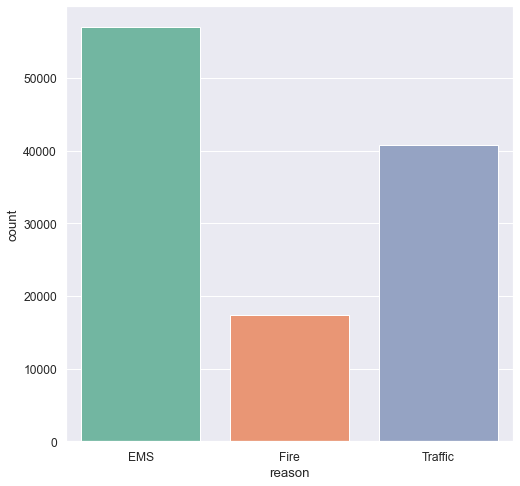

In [12]:
#Reasons representation
sns.countplot(data=df,x='reason',palette='Set2');

In [13]:
#Jan month hase the most calls
df.month.value_counts()

1     13096
7     12088
8     11904
6     11732
9     11669
2     11396
5     11374
4     11287
3     11059
12     7916
10     1690
Name: month, dtype: int64

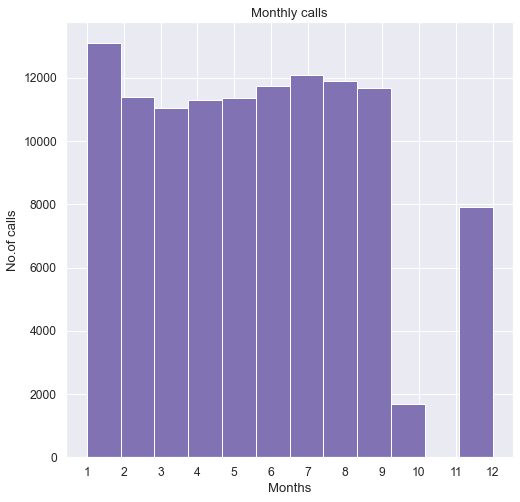

In [14]:
#Months representation
plt.hist(x=df['month'],bins=12,color='m')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title('Monthly calls')
plt.xlabel('Months')
plt.ylabel('No.of calls')
plt.show()

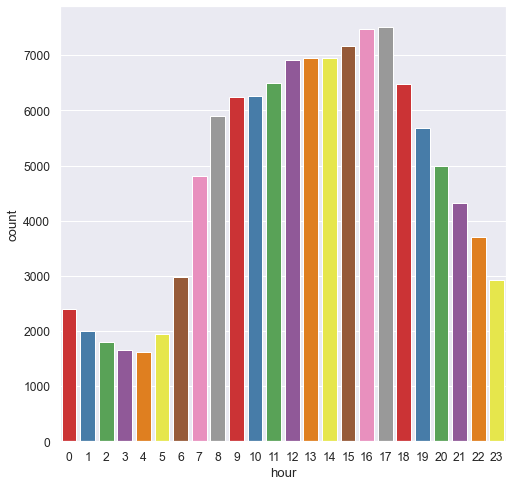

In [20]:
#More calls at 5 PM
sns.countplot(data=df,x='hour',palette='Set1');

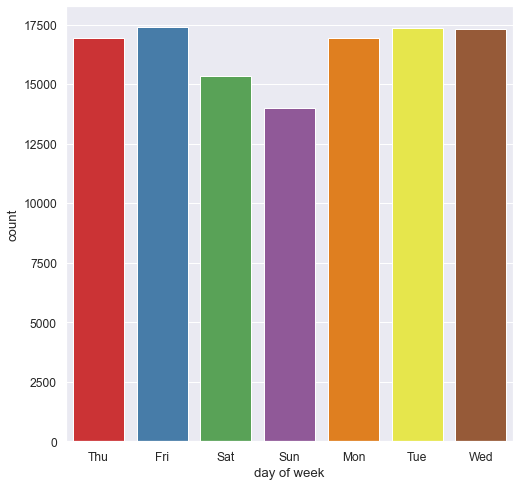

In [41]:
#Friday has the most calls
sns.countplot(data=df,x='day of week',palette='Set1');

<AxesSubplot:xlabel='hour', ylabel='count'>

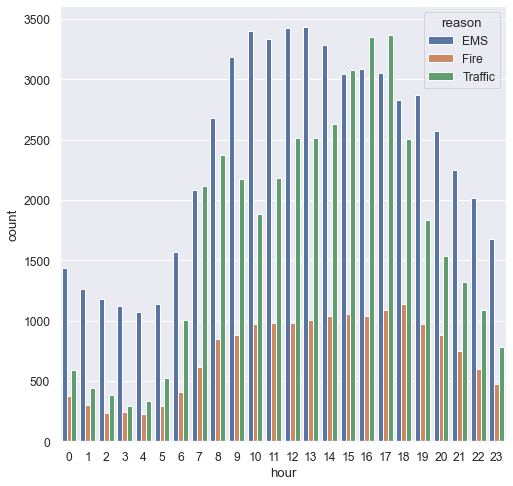

In [47]:
#In each hour more EMS calls occured
sns.countplot(data=df,x='hour',hue='reason')

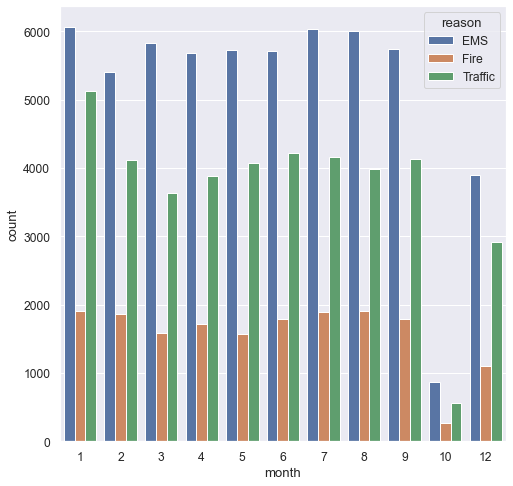

In [76]:
#For each month more EMS calls 
sns.countplot(data=df,x='month',hue='reason',palette='deep');

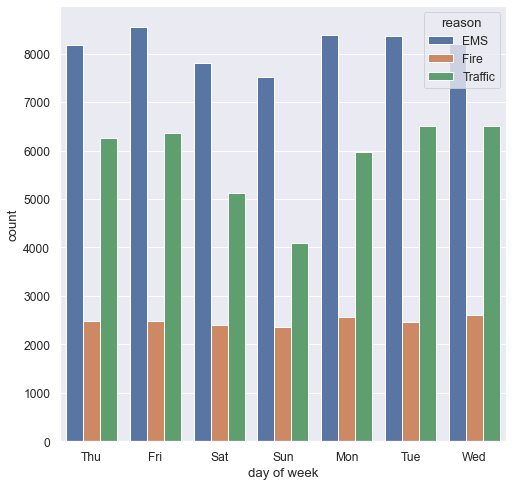

In [82]:
#For each day of the week more EMS calls
sns.countplot(data=df,x='day of week',hue='reason',palette='deep');

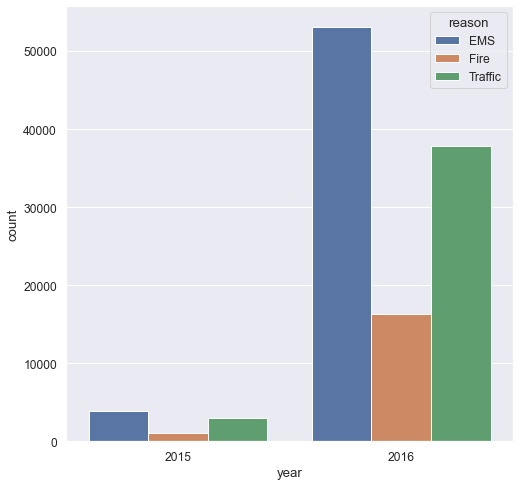

In [85]:
#More EMS calls for each year
sns.countplot(data=df,x='year',hue='reason',palette='deep');